# Conversion Rate Analysis

---

## Introduction

This notebook will execute a conversion rate dataset, which covering some user information. We will examine the impact of each factor on the final conversion rate and make meaningful business decisions to improve our data.

## Motivation

The goal of this analysis is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve revenue.

## Data description

"the data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session"
* **source** : Data science take home challenge

* **country** : user country based on the IP address
* **age** : user age. Self-reported at sign-in step
* **new_user**: whether the user created the account during this session or had already an account and simply came back to the site
* **source** : marketing channel source
* **Ads**: came to the site by clicking on an advertisement
* **Seo**: came to the site by clicking on search results
* **Direct**: came to the site by directly typing the URL on the browser
* **total_pages_visited**: number of total pages visited during the session. This is a proxy for time spent on-site and engagement during the session.
* **converted**: This is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase the conversion rate: # conversions / total sessions.

In [55]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import train test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Importing and Exploring Data

In [56]:
data = pd.read_csv('conversion_data.csv')

In [57]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [59]:
data.isnull().sum().to_frame()

,0
country,0
age,0
new_user,0
source,0
total_pages_visited,0
converted,0


In [60]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Obesevation

- Relatively young user age
- Ages factor might contain outliers due to the maximum age(123)

In [61]:
uniques = sorted(data['age'].unique())
print(uniques)

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]


## Remove Outliers

In [62]:
data[data['age'] > 70]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
208969,US,72,1,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1


In [63]:
data[data['age'] > 80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [64]:
data = data[data['age'] < 80]

## Exploratory Data Analysis

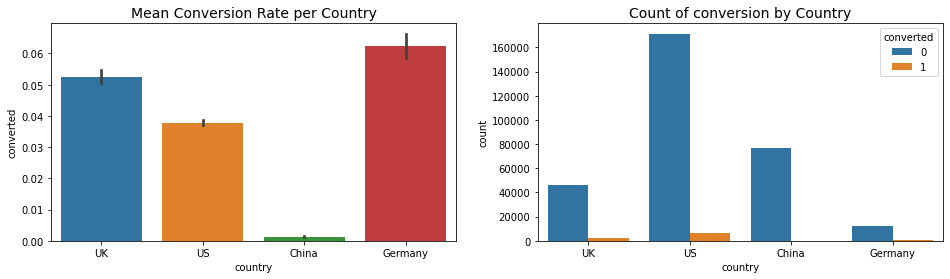

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.barplot(x='country', y='converted', data=data, ax=ax[0])
ax[0].set_title('Mean Conversion Rate per Country', fontsize=14)
sns.countplot(x='country', hue='converted', data=data, ax=ax[1])
ax[1].set_title('Count of conversion by Country', fontsize=14)
plt.show()

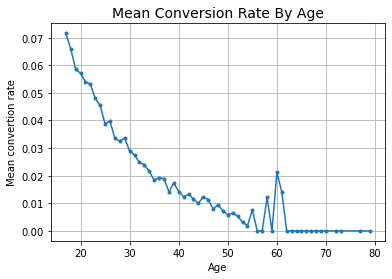

In [42]:
# visulization by ages
grouped_a = data[['age', 'converted']].groupby('age').mean().reset_index()
plt.plot(grouped_a['age'], grouped_a['converted'], '.-')
plt.title('Mean Conversion Rate By Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Mean convertion rate')
plt.grid(True)
plt.show()

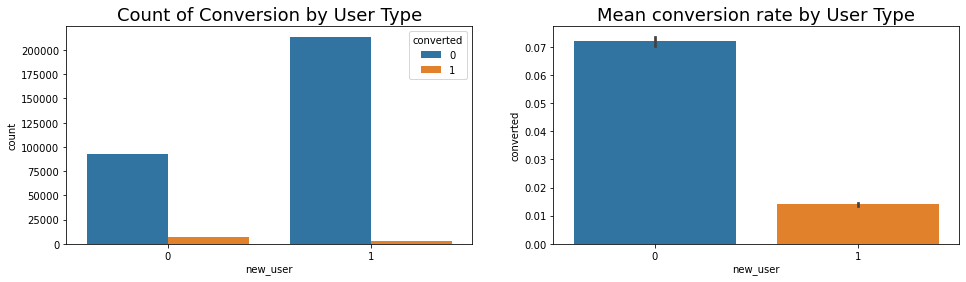

In [43]:
# Visulization by user type (whether new user or not)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.countplot(data=data, x='new_user', hue='converted', ax=ax[0])
ax[0].set_title('Count of Conversion by User Type', fontsize=18)
sns.barplot(data=data, x='new_user', y='converted', ax=ax[1])
ax[1].set_title('Mean conversion rate by User Type', fontsize=18)
plt.show()

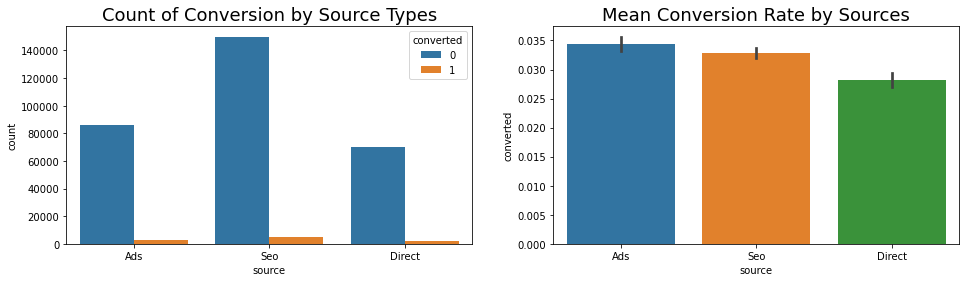

In [44]:
# Visulization by Sources
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.barplot(data=data, x='source', y='converted', ax=ax[1])
sns.countplot(data=data, x='source', hue='converted', ax=ax[0])
ax[0].set_title('Count of Conversion by Source Types', fontsize=18)
ax[1].set_title('Mean Conversion Rate by Sources', fontsize=18)
plt.show()

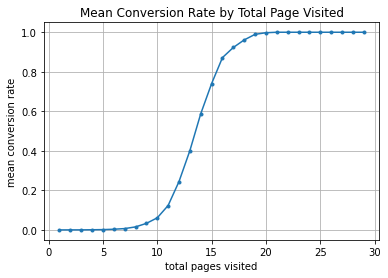

In [68]:
# Visulization by total page visited
grouped_t = data[['total_pages_visited', 'converted']] \
            .groupby('total_pages_visited').mean().reset_index()
plt.plot(grouped_t['total_pages_visited'], grouped_t['converted'], '.-')
plt.grid(True)
plt.title('Mean Conversion Rate by Total Page Visited')
plt.xlabel('total pages visited')
plt.ylabel('mean conversion rate')
plt.show()

## Observation

* China has a large number of the user but with an extremely low conversion rate
* Mean Conversion Rate drop dramatically along with the increasing ages. This means that the site works well for young users.
* New users are less likely to convert within the session
* People are more likely to convert after reading 15 pages during the session

## Correlations

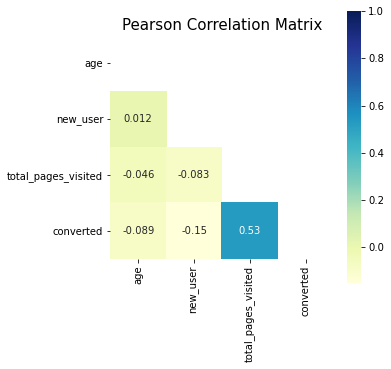

In [74]:
f, ax = plt.subplots(figsize=(5, 5))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), vmax=1, annot=True,
                mask=mask, square=True, cmap="YlGnBu")
plt.title('Pearson Correlation Matrix', fontsize=15)
plt.show()

## Machine Learning: Decision Tree

In [47]:
# convert categorical data to numerical
data = pd.get_dummies(data, columns=['country','source'], 
                      prefix=['country','source'])

In [48]:
features = data.loc[:, data.columns != 'converted']
labels = data['converted']

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2)

# Print the number of training examples and the number of testing examples
print(len(features_train), len(features_test))

252958 63240


In [49]:
# Create an untrained model
model = DecisionTreeClassifier()

# Train it on the **training set**
model.fit(features_train, labels_train)

# Compute training accuracy
train_predictions = model.predict(features_train)
print('Train Accuracy:', accuracy_score(labels_train, train_predictions))

# Compute test accuracy
test_predictions = model.predict(features_test)
print('Test  Accuracy:', accuracy_score(labels_test, test_predictions))

Train Accuracy: 0.9880770720831126
Test  Accuracy: 0.9854048070841239


In [50]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2, random_state=2)

accuracies = []
for i in range(1, 30):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    model.fit(features_train, labels_train)

    pred_train = model.predict(features_train)
    train_acc = accuracy_score(labels_train, pred_train)

    pred_test = model.predict(features_test)
    test_acc = accuracy_score(labels_test, pred_test)

    accuracies.append({'max depth': i, 'train accuracy': train_acc, 
                       'test accuracy': test_acc})
accuracies = pd.DataFrame(accuracies)


# Define a function to plot the accuracies

def plot_accuracies(accuracies, column, name):
    """
    accuracies: A DataFrame show the train/test accuracy for various max_depths
    column: Which column to plot (e.g., 'train accuracy')
    name: The display name for this column (e.g., 'Train')
    """
    sns.relplot(kind='line', x='max depth', y=column, data=accuracies)
    plt.title(f'{name} Accuracy as Max Depth Changes')
    plt.xlabel('Max Depth')
    plt.ylabel(f'{name} Accuracy')
    plt.ylim(0.6, 1)

    plt.show()  # Display the graph


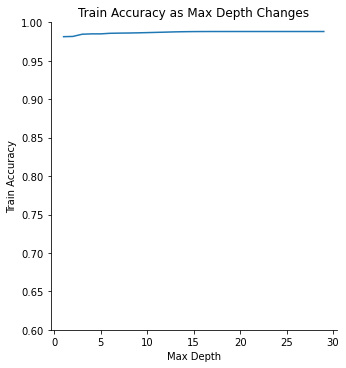

In [51]:
plot_accuracies(accuracies, 'train accuracy', 'Train')

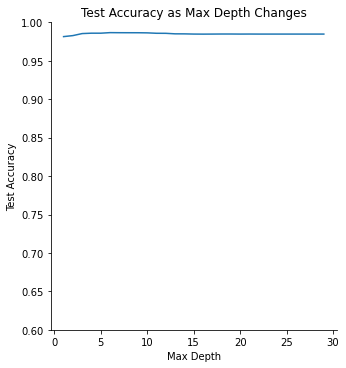

In [52]:
plot_accuracies(accuracies, 'test accuracy', 'Test')

## Conclusion And Suggestions

1. Old users tend to do better. Try to send targeted emails to keep in touch with them and bring them back. Special offers may be a good choice. 
2. Chinese users contributed to a large portion of our conversion rate, but, their conversion rate is extremely low. The company should take action since China is such a huge opportunity. Maybe there is an issue with the Chinese version website, such as poor translation. 

3. Young people should be the targeted group for the website.

4. Users tend to buy after reading 15 pages. Enhance user experience on the website may be a good choice to let them stay longer. 

5. Also, if someone visited many pages, but hasn't converted, since there is a high chance that this person would purchase, pushing targeted offers can be a good choice.
